# Prediction of Term Deposit in a Portuguese Bank

In [1]:
#Import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data into a dataframe
df = pd.read_csv('/content/bank-additional-full.csv')

# Metadata
## Bank Client Data
* **ID** : Unique identifier for each respondent. 
* **age** (numeric)
* **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* **education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* **default**: has credit in default? (categorical: 'no','yes','unknown')
* **housing**: has housing loan? (categorical: 'no','yes','unknown')
* **loan**: has personal loan? (categorical: 'no','yes','unknown')

## Related with the last contact of the current campaign:
* **contact**: contact communication type (categorical: 'cellular','telephone')
* **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## Other attributes:
* **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* **previous**: number of contacts performed before this campaign and for this client (numeric)
* **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
social and economic context attributes
* **emp.var.rate**: employment variation rate - quarterly indicator (numeric)
* **cons.price.idx**: consumer price index - monthly indicator (numeric)
* **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)
* **euribor3m**: euribor 3 month rate - daily indicator (numeric)
* **nr.employed**: number of employees - quarterly indicator (numeric)
Output variable (desired target):
* **y** - has the client subscribed a term deposit? (binary: 'yes','no')


In [3]:
# Drop "duration" because it will always be zero before the campaign
df = df.drop(['duration'],axis=1)

# Exploratory Data Analysis

In [4]:
df.head()

,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,ID00001,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,ID00002,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,ID00003,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,ID00004,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,ID00005,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.tail()

,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,ID41184,73,retired,married,professional.course,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,ID41185,46,blue-collar,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,ID41186,56,retired,married,university.degree,no,yes,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,ID41187,44,technician,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,ID41188,74,retired,married,professional.course,no,yes,no,cellular,nov,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
# Check for datatypes and Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              41188 non-null  object 
 1   age             41188 non-null  int64  
 2   job             41188 non-null  object 
 3   marital         41188 non-null  object 
 4   education       41188 non-null  object 
 5   default         41188 non-null  object 
 6   housing         41188 non-null  object 
 7   loan            41188 non-null  object 
 8   contact         41188 non-null  object 
 9   month           41188 non-null  object 
 10  day_of_week     41188 non-null  object 
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

No null values. All features have the correct datatypes

In [7]:
#Converting nr.employed (Number of employees) to Integer
df['nr.employed'] = df['nr.employed'].astype('int64')

In [8]:
df.dtypes

ID                 object
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed         int64
y                  object
dtype: object

In [9]:
#Review statistical summary for all numerical variables
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5166.849446
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.328375
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bbc853dd0>,
      dtype=object)

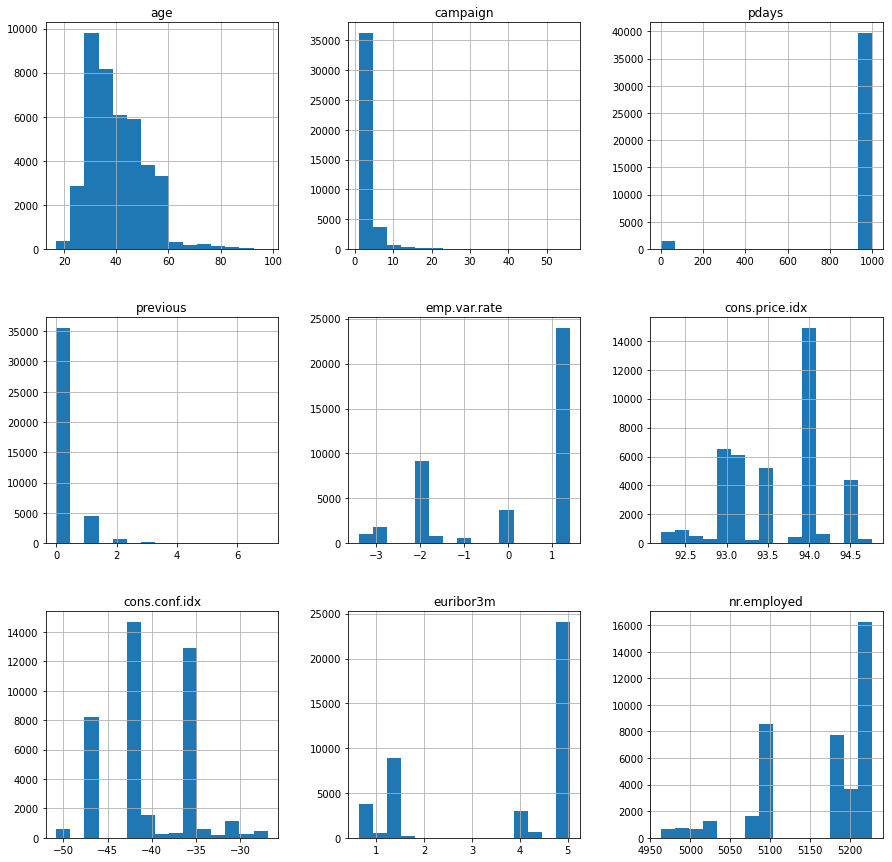

In [10]:
#Snapshot of all numerical variables
df.hist(figsize=(15,15),bins=15)

In [11]:
# Unique value counts
for c in df.columns:
    if df[c].dtype == object:
        #print(c)
        print(df[c].value_counts(ascending = False))
        print("\n")

ID00001    1
ID27513    1
ID27455    1
ID27456    1
ID27457    1
          ..
ID13731    1
ID13732    1
ID13733    1
ID13734    1
ID41188    1
Name: ID, Length: 41188, dtype: int64


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


no         32588
unknown     8597
yes            3
Name: default, dtype: int64


yes        21576
no         18622
unknown      990
Name: housing, dt

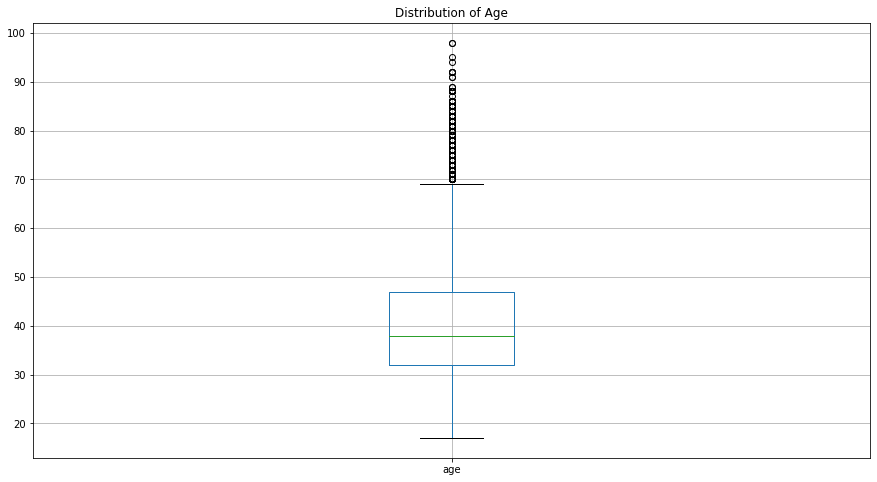

In [12]:
# Check for outlier in age
plt.figure(figsize=(15,8))
df[['age']].boxplot()
plt.title("Distribution of Age")
plt.show()

There are quite a number of senior citizens in the list of respondents. We will not consider them as outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bbbdc8910>,
      dtype=object)

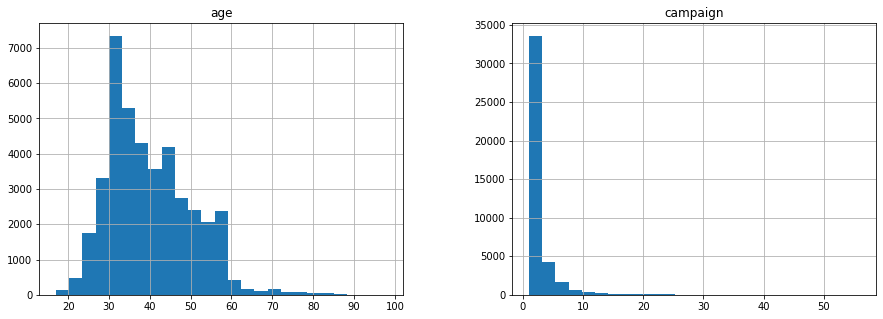

In [13]:
#Check the distribution of age, duration and campaign
df[['age', 'campaign']].hist(figsize=(15,5),bins=25)

* Majority of the respondents were between ages of 30 and 45
* Majority of the customers had less than 5 contacts


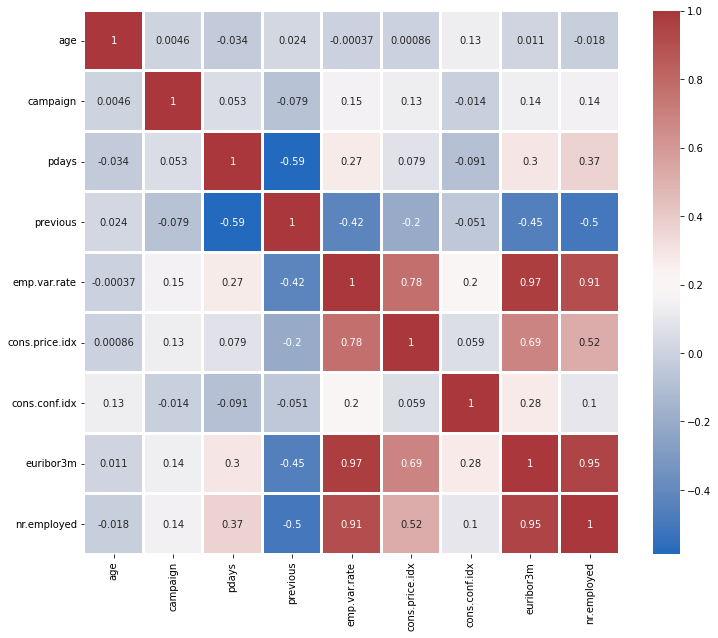

In [14]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(),
           annot = True,
           cmap = sns.color_palette('vlag', as_cmap = True),
           linewidths = 2,
           linecolor = 'white')
#plt.title('Correlation Matrix of Obesity')
plt.show()

Strong positive correlation between:
* euribor3m (3 month Euro Interbank Offer Rate) & emp.var.rate  (Employment Variation Rate)
* euribor3m (3 month Euro Interbank Offer Rate) and nr.employed (Number of Employees)
* np.employed (Number of Employees) and emp.var.rate (Employment Variation Rate)

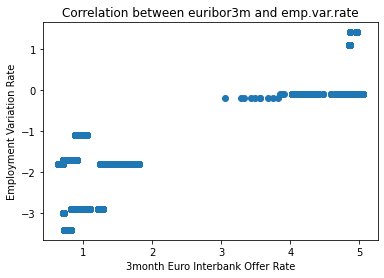

In [15]:
plt.scatter(df['euribor3m'], df['emp.var.rate'])
plt.xlabel("3month Euro Interbank Offer Rate")
plt.ylabel("Employment Variation Rate")
plt.title("Correlation between euribor3m and emp.var.rate")
plt.show()

# Model Preprocessing

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              41188 non-null  object 
 1   age             41188 non-null  int64  
 2   job             41188 non-null  object 
 3   marital         41188 non-null  object 
 4   education       41188 non-null  object 
 5   default         41188 non-null  object 
 6   housing         41188 non-null  object 
 7   loan            41188 non-null  object 
 8   contact         41188 non-null  object 
 9   month           41188 non-null  object 
 10  day_of_week     41188 non-null  object 
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [17]:
#Label encoder for nominal data
from sklearn.preprocessing import LabelEncoder

#Creating instance of labelencoder
labelencoder = LabelEncoder()

#Assigning numerical values to categorical data
nominal_col = ['ID', 'job', 'marital', 'education','default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for i in nominal_col:
    df[i] = labelencoder.fit_transform(df[i])

In [18]:
df.head()

,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,3,1,0,0,0,0,1,6,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,no
1,1,57,7,1,3,1,0,0,1,6,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,no
2,2,37,7,1,3,0,2,0,1,6,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,no
3,3,40,0,1,1,0,0,0,1,6,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,no
4,4,56,7,1,3,0,0,2,1,6,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,no


# Models

### 1. DecisionTree Classifier

In [19]:
df.dtypes

ID                  int64
age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed         int64
y                  object
dtype: object

In [20]:
#Loading train,test & split package
from sklearn.model_selection import train_test_split

#Separate features from target variable and save in X
X_dt = df.drop(['y','ID'],axis=1)

#Separate the target and save it in y
y_dt = df[['y']]

#Split the data into training and testing with a ratio of 15:85 for testing:training
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size = 0.15, random_state = 42)

In [21]:
X_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  int64  
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [22]:
#Loading Decision tree classifier package
from sklearn.tree import DecisionTreeClassifier

#Use decision tree classifier for modeling
clf_model = DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth = 6, min_samples_leaf = 5)

                                   
#Fit training data into the decision tree model
clf_model.fit(X_dt_train,y_dt_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=42)

In [23]:
#Predict the target value using the decision tree model
y_dt_pred = clf_model.predict(X_dt_test)

In [24]:
#Print predicted target value
y_dt_pred[:100]

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no'], dtype=object)

In [25]:
#Loadind Decision tree metrics packages
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#Print accuracy score
print(accuracy_score(y_dt_test,y_dt_pred))

0.8972325619032205


In [26]:
#Print confusion matrix
print(confusion_matrix(y_dt_test, y_dt_pred))

#Print classification report
print(classification_report(y_dt_test, y_dt_pred))

[[5396   82]
 [ 553  148]]
              precision    recall  f1-score   support

          no       0.91      0.99      0.94      5478
         yes       0.64      0.21      0.32       701

    accuracy                           0.90      6179
   macro avg       0.78      0.60      0.63      6179
weighted avg       0.88      0.90      0.87      6179



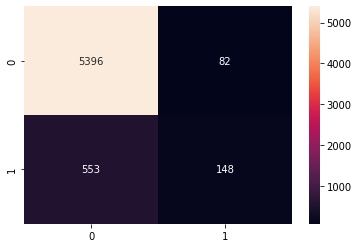

In [27]:
sns.heatmap(confusion_matrix(y_dt_test, y_dt_pred), annot = True, fmt ='g')
plt.show()

In [28]:
#Calculate feature importance
importances=clf_model.feature_importances_
importances

array([1.60131620e-02, 1.32530790e-03, 0.00000000e+00, 2.61789215e-04,
       2.70467689e-03, 9.43682885e-04, 0.00000000e+00, 2.18644162e-02,
       3.18199985e-02, 1.73772672e-02, 1.20943964e-02, 1.76630058e-02,
       1.03536176e-02, 1.08325300e-01, 0.00000000e+00, 1.48663521e-02,
       5.65904492e-02, 6.73328771e-02, 6.20463701e-01])

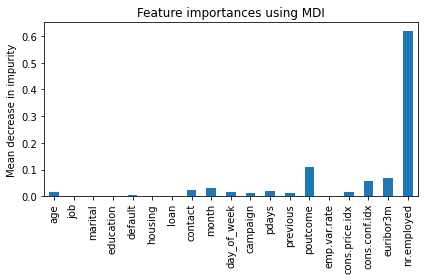

In [29]:
#Plot feature Importance
dt_importances = pd.Series(importances, index=X_dt.columns)

fig, ax = plt.subplots()
dt_importances.plot.bar( ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Extracting important features 

In [30]:
#Extract important features
X_dt2 = df[['age','month','poutcome', 'cons.conf.idx','euribor3m', 'nr.employed']]

#Separate the target and save it in y
y_dt2 = df[['y']]

#Split the data into training and testing with a ratio of 15:85 for testing:training
X_dt2_train, X_dt2_test, y_dt2_train, y_dt2_test = train_test_split(X_dt2, y_dt2, test_size = 0.15, random_state = 42)

In [31]:
#Calculate New feature importance
importances_2=clf_model.feature_importances_
importances_2

array([1.60131620e-02, 1.32530790e-03, 0.00000000e+00, 2.61789215e-04,
       2.70467689e-03, 9.43682885e-04, 0.00000000e+00, 2.18644162e-02,
       3.18199985e-02, 1.73772672e-02, 1.20943964e-02, 1.76630058e-02,
       1.03536176e-02, 1.08325300e-01, 0.00000000e+00, 1.48663521e-02,
       5.65904492e-02, 6.73328771e-02, 6.20463701e-01])

In [32]:
#Loading Decision tree classifier package
from sklearn.tree import DecisionTreeClassifier

#Use decision tree classifier for modeling
clf_model_2 = DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth = 6, min_samples_leaf = 5)

#Fit training data into the decision tree model
clf_model_2.fit(X_dt2_train,y_dt2_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=42)

In [33]:
#Predict the target value using the decision tree model
y_dt_pred2 = clf_model_2.predict(X_dt2_test)

In [34]:
#Loadind Decision tree metrics packages
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#Print accuracy score
#print(accuracy_score(y_test,y_pred))
print('')
print("Accuracy Score:",round(accuracy_score(y_dt2_test,y_dt_pred2)*100,2),'%')


Accuracy Score: 89.72 %


In [35]:
#Calculate New feature importance
dt_importances_2=clf_model_2.feature_importances_
dt_importances_2

array([0.03357926, 0.02718249, 0.13259901, 0.06331647, 0.07458428,
       0.66873849])

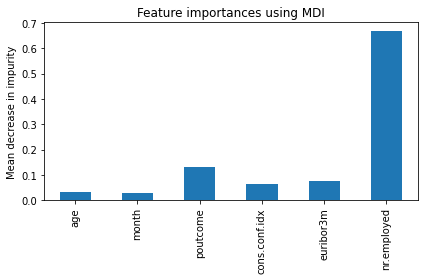

In [36]:
#Plot New feature Importance
dt_importances_2 = pd.Series(dt_importances_2, index=X_dt2.columns)

fig, ax = plt.subplots()
dt_importances_2.plot.bar( ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## 2. Logistic Regression Classifier

In [37]:
#Separate features from target variable and save in X
X_lr = df.drop(['y','ID'],axis=1)

#Separate the target and save it in y
y_lr = df[['y']]

#Split the data into training and testing with a ratio of 15:85 for testing:training
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size = 0.15, random_state = 42)

In [38]:
from sklearn.linear_model import LogisticRegression
clf_model_2 = LogisticRegression(random_state=0).fit(X_lr_train, y_lr_train)

clf_model_2.fit(X_lr_train,y_lr_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

LogisticRegression(random_state=0)

In [39]:
#Predict the target value using the decision tree model
y_lr_pred = clf_model_2.predict(X_lr_test)

In [40]:
#Print predicted target value
y_lr_pred[:100]

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no'], dtype=object)

In [41]:
#Loadind Decision tree metrics packages
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#Print accuracy score
#print(accuracy_score(y_test,y_pred_2))
print('')
print("Accuracy Score:",round(accuracy_score(y_lr_test,y_lr_pred)*100,2),'%')


Accuracy Score: 89.76 %


In [42]:
#Print confusion matrix
print(confusion_matrix(y_lr_test, y_lr_pred))

#Print classification report
print(classification_report(y_lr_test, y_lr_pred))

[[5411   67]
 [ 566  135]]
              precision    recall  f1-score   support

          no       0.91      0.99      0.94      5478
         yes       0.67      0.19      0.30       701

    accuracy                           0.90      6179
   macro avg       0.79      0.59      0.62      6179
weighted avg       0.88      0.90      0.87      6179



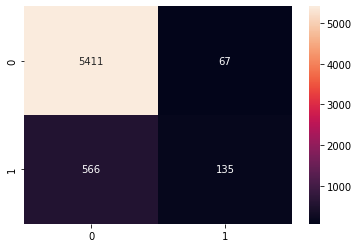

In [43]:
sns.heatmap(confusion_matrix(y_lr_test, y_lr_pred), annot = True, fmt ='g')
plt.show()

## 3. Random Forest Classifier

In [44]:
#Separate features from target variable and save in X
X_rf = df.drop(['y','ID'],axis=1)

#Separate the target and save it in y
y_rf = df['y']

# Splitting the dataset into the Training set and Test set
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2)

# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_rf_train, y_rf_train)

# Predicting the Test set results
y_rf_pred = classifier_rf.predict(X_rf_test)


Accuracy Score: 88.92 %

              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7300
         yes       0.52      0.29      0.37       938

    accuracy                           0.89      8238
   macro avg       0.72      0.63      0.66      8238
weighted avg       0.87      0.89      0.87      8238


Confusion Matrix



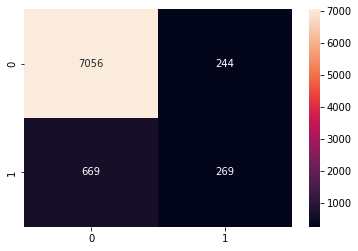

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report

# Evaluating the results
print('')
print("Accuracy Score:",round(accuracy_score(y_rf_test,y_rf_pred)*100,2),'%')

print('')
print(classification_report(y_rf_test, y_rf_pred))

print('')
print("Confusion Matrix\n")
sns.heatmap(confusion_matrix(y_rf_test, y_rf_pred), annot = True, fmt ='g')
plt.show()

In [46]:
#Extract important features
X_rf2 = df[['age','month','poutcome', 'cons.conf.idx','euribor3m', 'nr.employed']]

#Separate the target and save it in y
y_rf2 = df[['y']]

In [47]:
#Split the data into training and testing with a ratio of 15:85 for testing:training
X_rf2train, X_rf2test, y_rf2train, y_rf2test = train_test_split(X_rf2, y_rf2, test_size = 0.15, random_state = 42)


In [48]:
#Calculate New feature importance
importances_3=clf_model.feature_importances_
importances_3

array([1.60131620e-02, 1.32530790e-03, 0.00000000e+00, 2.61789215e-04,
       2.70467689e-03, 9.43682885e-04, 0.00000000e+00, 2.18644162e-02,
       3.18199985e-02, 1.73772672e-02, 1.20943964e-02, 1.76630058e-02,
       1.03536176e-02, 1.08325300e-01, 0.00000000e+00, 1.48663521e-02,
       5.65904492e-02, 6.73328771e-02, 6.20463701e-01])

In [49]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_rf2train, y_rf2train)

# Predicting the Test set results
y_rf2pred = classifier_rf.predict(X_rf2test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until



Accuracy Score: 88.87 %

              precision    recall  f1-score   support

          no       0.91      0.97      0.94      5478
         yes       0.52      0.29      0.37       701

    accuracy                           0.89      6179
   macro avg       0.72      0.63      0.65      6179
weighted avg       0.87      0.89      0.87      6179


Confusion Matrix



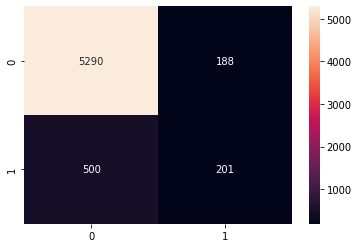

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report

# Evaluating the results
print('')
print("Accuracy Score:",round(accuracy_score(y_rf2test,y_rf2pred)*100,2),'%')

print('')
print(classification_report(y_rf2test, y_rf2pred))

print('')
print("Confusion Matrix\n")
sns.heatmap(confusion_matrix(y_rf2test, y_rf2pred), annot = True, fmt ='g')
plt.show()

# SVM Classifier

In [51]:
#Separate features from target variable and save in X
X_svm = df.drop(['y','ID'],axis=1)

#Separate the target and save it in y
y_svm = df['y']

# Splitting the dataset into the Training set and Test set
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_svm, y_svm, test_size=0.2)

# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm = SVC(kernel='rbf', random_state=1, gamma=0.5, C=10.0)
classifier_svm.fit(X_svm_train, y_svm_train)


# Predicting the Test set results
y_svm_pred = classifier_svm.predict(X_svm_test)


Accuracy Score: 87.59 %

              precision    recall  f1-score   support

          no       0.89      0.98      0.93      7315
         yes       0.21      0.04      0.07       923

    accuracy                           0.88      8238
   macro avg       0.55      0.51      0.50      8238
weighted avg       0.81      0.88      0.84      8238


Confusion Matrix



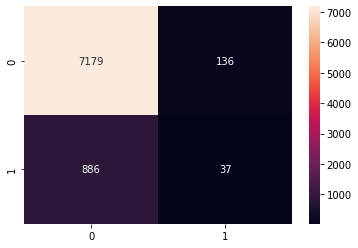

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report

# Evaluating the results
print('')
print("Accuracy Score:",round(accuracy_score(y_svm_test,y_svm_pred)*100,2),'%')

print('')
print(classification_report(y_svm_test, y_svm_pred))

print('')
print("Confusion Matrix\n")
sns.heatmap(confusion_matrix(y_svm_test, y_svm_pred), annot = True, fmt ='g')
plt.show()

# Results

In [53]:
results = {'Models': ['Decision Tree', 'Logistic Regression', 'Random Forest', 'SVM'], 'Accuracy': [round(accuracy_score(y_dt_test,y_dt_pred)*100,2),round(accuracy_score(y_lr_test,y_lr_pred)*100,2),round(accuracy_score(y_rf_test,y_rf_pred)*100,2),round(accuracy_score(y_svm_test, y_svm_pred)*100,2) ]}
results

{'Models': ['Decision Tree', 'Logistic Regression', 'Random Forest', 'SVM'],
 'Accuracy': [89.72, 89.76, 88.92, 87.59]}

In [54]:
results_df = pd.DataFrame(data=results)
results_df

,Models,Accuracy
0,Decision Tree,89.72
1,Logistic Regression,89.76
2,Random Forest,88.92
3,SVM,87.59


# Logistic Regression had the highest Accuracy of 89.76%